In [81]:
import matplotlib.pyplot as plt
from tools._vectools import e_n
from scipy.optimize import root_scalar
from scipy.linalg import expm

import numpy as np
np.set_printoptions(linewidth=np.inf, precision=2)

In [ ]:
def add_conj(mat):
    return mat + mat.conj().T

def H_cell(phi,U):
    #0,4,7,9 are the doubly occupied states
    mat = np.zeros((10,10),dtype="complex128")
    
    mat[0,0] = U/2
    mat[0,1] = mat[0,2] = 1
    
    mat[1,3] = mat[1,5] = 1
    
    mat[2,5] = 1
    mat[2,3] = np.exp(1j*phi)
    
    mat[3,6] = mat[3,8] = 1
    
    mat[4,4] = U/2
    mat[4,1] = mat[4,6] = 1
    
    mat[5,6] = np.exp(1j*phi)
    mat[5,8] = 1
    
    
    mat[7,7] = U/2
    mat[7,2] = 1
    mat[7,8] = np.exp(1j*phi)
    
    mat[9,9] = U/2
    mat[9,6] = 1
    mat[9,8]  = np.exp(-1j*phi)
    
    return add_conj(mat)

N = 10
n_alpha = 2*np.outer(e_n(0,N),e_n(0,N)) + np.outer(e_n(1,N),e_n(1,N)) + np.outer(e_n(1,N),e_n(1,N)) + np.outer(e_n(1,N),e_n(1,N))
n_beta = 2*np.outer(e_n(4,N),e_n(4,N)) + np.outer(e_n(1,N),e_n(1,N)) + np.outer(e_n(5,N),e_n(5,N)) + np.outer(e_n(6,N),e_n(6,N))
n_gamma = 2*np.outer(e_n(7,N),e_n(7,N)) + np.outer(e_n(2,N),e_n(2,N)) + np.outer(e_n(5,N),e_n(5,N)) + np.outer(e_n(8,N),e_n(8,N))
n_delta = 2*np.outer(e_n(9,N),e_n(9,N)) + np.outer(e_n(3,N),e_n(3,N)) + np.outer(e_n(6,N),e_n(6,N)) + np.outer(e_n(8,N),e_n(8,N))



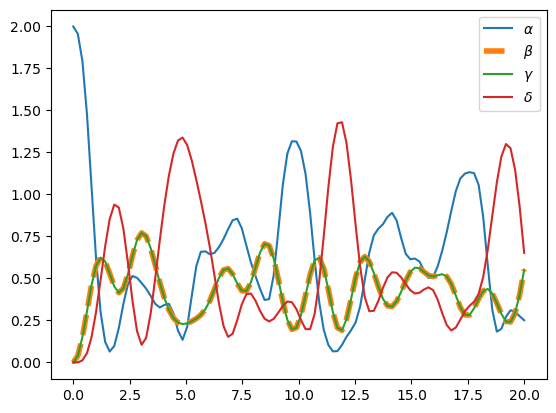

In [117]:
ham = H_cell(np.pi/2,0)
N = np.shape(ham)[1]
T = 20
steps = 100
init_states = [e_n(0,N)]

for idx, state in enumerate(init_states):
    time = np.linspace(0,T,steps)
    supp_a = []
    supp_b = []
    supp_c = []
    supp_d = []

    for t in time:
        supp_a.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_alpha @ expm(1j * t * ham) @ state))
        supp_b.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_beta @ expm(1j * t * ham) @ state))
        supp_c.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_gamma @ expm(1j * t * ham) @ state))
        supp_d.append( np.abs(state.conj().T @  expm(-1j * t * ham) @ n_delta @ expm(1j * t * ham) @ state))
        

        
plt.plot(time,supp_a,label=r"$\alpha$")
plt.plot(time,supp_b,label=r"$\beta$",linestyle="--",lw=4)
plt.plot(time,supp_c,label=r"$\gamma$")
plt.plot(time,supp_d,label=r"$\delta$")

plt.legend()

In [88]:
np.linalg.norm(state)

1.0

In [91]:
np.linalg.norm(state.conj().T @  np.exp(-1j * t * ham))

3.1622776601683795

In [92]:
np.linalg.norm(np.exp(1j * t * ham) @ state)

3.1622776601683795

In [116]:
H_cell(np.pi,2)

array([[ 2.+0.00e+00j,  1.+0.00e+00j,  1.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j],
       [ 1.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  1.+0.00e+00j,  1.+0.00e+00j,  1.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j],
       [ 1.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j, -1.+1.22e-16j,  0.+0.00e+00j,  1.+0.00e+00j,  0.+0.00e+00j,  1.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j],
       [ 0.+0.00e+00j,  1.+0.00e+00j, -1.-1.22e-16j,  0.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  1.+0.00e+00j,  0.+0.00e+00j,  1.+0.00e+00j,  0.+0.00e+00j],
       [ 0.+0.00e+00j,  1.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  2.+0.00e+00j,  0.+0.00e+00j,  1.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j],
       [ 0.+0.00e+00j,  1.+0.00e+00j,  1.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j,  0.+0.00e+00j, -1.+1.22e-16j,  0.+0.00e+00j,  1.+0.00e+00j,  0.+0.00e+00j],
       [ 0.+0.00e+00j,  0.+0.00e+00j,  0.+0.00